# Problem Definition
    
    Objective:  
            1. Explore and visualize data. 
            
            2. Build a linear regression model to predict the prices of used cars. 
            
            3. Generate a set of insights and recommendations that will help the business.
            
    Dataset:

            1. S.No. : Serial Number
            
            2. Name : Name of the car which includes Brand name and Model name
            
            3. Location : The location in which the car is being sold or is available for purchase Cities
            
            4. Year : Manufacturing year of the car
            
            5. Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
            
            6. Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
            
            7. Transmission : The type of transmission used by the car. (Automatic / Manual)
            
            8. Owner : Type of ownership
            
            9. Mileage : The standard mileage offered by the car company in kmpl or km/kg
            
            10. Engine : The displacement volume of the engine in CC.
            
            11. Power : The maximum power of the engine in bhp.
            
            12. Seats : The number of seats in the car.
            
            13. New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
            
            14. Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)
            
    Steps to achieve the objective:
            
            Define the problem and perform an Exploratory Data Analysis(10)
                                                        
            Illustrate the insights based on EDA(5)

            Data pre-processing(15)

            Model building - Linear Regression(12)

            Model performance evaluation(6)

            Actionable Insights & Recommendations(6)

            Notebook - Overall Quality(6)

    
    

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings

warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


#### Reading Data, and sampling 5 random rows of the dataset.

In [225]:
cars4u = pd.read_csv('used_cars_data.csv')
df = cars4u.copy()
print(df.shape)
np.random.seed(5)
df.sample(5)

(7253, 14)


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1904,1904,Mercedes-Benz New C-Class 250 CDI Classic,Hyderabad,2012,41367,Diesel,Automatic,First,15.8 kmpl,2148 CC,170 bhp,5.0,NaN,18.49
7160,7160,Mini Cooper Countryman D,Hyderabad,2013,50000,Diesel,Automatic,First,23.8 kmpl,1998 CC,112 bhp,5.0,NaN,NaN
3854,3854,Hyundai Sonata GOLD,Chennai,2003,44200,Petrol,Manual,Second,11.7 kmpl,1997 CC,134 bhp,5.0,NaN,1.50
489,489,Mercedes-Benz GLS 350d 4MATIC,Pune,2017,129000,Diesel,Automatic,First,11.0 kmpl,2987 CC,258 bhp,7.0,1 Cr,56.00
3819,3819,Renault Fluence 2.0,Jaipur,2011,63000,Petrol,Automatic,First,13.4 kmpl,1997 CC,135.1 bhp,5.0,NaN,4.75


#### Extracting columns in dataset

In [226]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

#### Dropping 'S.No' column, since we're not going to use it in our model.

In [227]:
df=df.drop(columns=['S.No.'])

#### Extracting Datatype of each column and Not-Null count in each column

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


#### Finding statistical information on the dataset. 

In [229]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2013.365366,5.869906e+04,5.279722,9.479468
std,3.254421,8.442772e+04,0.811660,11.187917
min,1996.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.341600e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


# Data Preprocessing 

#### function to process Mileage column. 

In [232]:
def mileage_to_num(mileage):
    if isinstance(mileage,str):
        if mileage.endswith(' km/kg'):
            return float(mileage.replace(' km/kg', " "))*(1.3)   # km/kg to kmpl conversion
        elif mileage.endswith(' kmpl'):
            return float(mileage.replace(' kmpl', " "))
    else:
        return np.nan

#### function to process Engine column

In [233]:
def engine_to_num(engine):
    if isinstance(engine, str):
        return float(engine.rstrip(" CC"))
    else:
        return np.nan

#### function to process Power column

In [234]:
df[df['Power']=='null bhp']=np.nan

In [235]:

def power_to_num(power):
     if isinstance(power, str):
        return float(power.rstrip(" bhp"))
     else:
        return np.nan

#### function to process New_Price column

In [236]:
def NewPrice_to_num(price):
    multiplier=1
    if isinstance(price, str):
        if price.endswith(' Lakh'):
            multiplier=100000
        elif price.endswith(' Cr'):
            multiplier=10000000
        return float(price.replace(' Lakh'," ").replace(' Cr', " "))*multiplier
    else:
        return np.nan

#### applying above created fuctions to respective columns

In [237]:
func_dict={"Mileage": mileage_to_num,
           "Engine": engine_to_num,
           "Power": power_to_num,
           "New_Price": NewPrice_to_num}
for k,v in func_dict.items():
    df[k]=df[k].map(v)

In [238]:
df[['Mileage','Engine','Power','New_Price']].head()

,Mileage,Engine,Power,New_Price
0,34.58,998.0,58.16,NaN
1,19.67,1582.0,126.20,NaN
2,18.20,1199.0,88.70,861000.0
3,20.77,1248.0,88.76,NaN
4,15.20,1968.0,140.80,NaN


#### processing 'Price' column

In [239]:
df['Price']=df['Price']*(100000)
df.Price.head()

0     175000.0
1    1250000.0
2     450000.0
3     600000.0
4    1774000.0
Name: Price, dtype: float64

In [240]:
df.dtypes

Name                  object
Location              object
Year                 float64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
dtype: object

# Missing Value Treatment

In [241]:
df.isnull().sum()

Name                  129
Location              129
Year                  129
Kilometers_Driven     129
Fuel_Type             129
Transmission          129
Owner_Type            129
Mileage               131
Engine                175
Power                 175
Seats                 178
New_Price            6247
Price                1341
dtype: int64

In [242]:
df.shape

(7253, 13)

#### Dropping empty rows in Price column
Price is the dependent variable so the rows that has Price==Null aren't going to be useful in model building. 

In [243]:
df = df.dropna(subset=['Price'])

In [244]:
df.shape

(5912, 13)

In [245]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5088
Price                   0
dtype: int64

In [246]:
missing_value=df.isnull().sum(axis=1)
missing_value.value_counts()

1    5050
0     823
4      36
2       3
dtype: int64

#### Finding rows with n number of missing values

In [247]:
for n in missing_value.value_counts().sort_index().index:
    if n > 0:
        print(f'For the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = df[missing_value == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')
    

For the rows with exactly 1 missing values, NAs are found in:
Mileage         1
New_Price    5049
dtype: int64



For the rows with exactly 2 missing values, NAs are found in:
Mileage      1
Seats        2
New_Price    3
dtype: int64



For the rows with exactly 4 missing values, NAs are found in:
Engine       36
Power        36
Seats        36
New_Price    36
dtype: int64





In [248]:
df[df['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra E Verito D4,Chennai,2016.0,50000.0,Electric,Automatic,First,NaN,72.0,41.0,5.0,1358000.0,1300000.0
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011.0,44000.0,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,1275000.0


#### Imputing missing values from google search 

In [249]:
df.loc[229,'Seats']=5    # google search
df.loc[1917,'Seats']=5
df.loc[4904,'Mileage']=20.1
df.loc[4446,'Mileage']=df.Mileage.median()

#### Creating fuction to extract Brand and Model from the Name column
Brand and Model columns can be useful in missing value imputation

In [250]:
def Name_to_Brand(Name):
    if isinstance(Name,str):
        return str(Name.split()[0])
    else:
        return np.nan
    

def Name_to_Model(Name):
    if isinstance(Name,str):
        return str(Name.split()[-1])
    else:
        return np.nan

In [251]:
df['Brand'] = df.Name.apply(Name_to_Brand)

In [252]:
df['Model'] = df.Name.apply(Name_to_Model)

#### Creating new DataFrames Brand_Model and Missing Rows from original dataframe 'df'
The idea is to split the original dataset 'df' into a dataframe (Brand_Model) that has no missing values for Engine, Power and Seats, and another dataframe (Missing_rows) that has all the missing values for Engine, Power and Seats. 

In [253]:
Brand_Model = df[['Name','Brand', 'Model','Engine','Power','Seats']]
Missing_rows = Brand_Model[Brand_Model['Power'].isnull()]

#### Dropping null values from Brand_Model dataframe

In [254]:
Brand_Model=Brand_Model.dropna()

#### Using the data in Brand_Model dataframe to impute empty fields in Missing rows
Brand_Model dataframe has Engine, Power and Seats value for all the rows. I am creating a for loop here that will impute missing values in Missing_rows from Brand_Model dataframe for matching Brand and Models. 

In [255]:
for i in ['Engine', 'Power', 'Seats']:
    for j in Missing_rows.index:
        for k in Brand_Model.index:
            if (Missing_rows.loc[j,'Brand']==Brand_Model.loc[k,'Brand']) and (Missing_rows.loc[j,'Model']==Brand_Model.loc[k,'Model']):
                Missing_rows.loc[j,i]=Brand_Model.loc[k,i]

In [256]:
Missing_rows

,Name,Brand,Model,Engine,Power,Seats
194,Honda City 1.5 GXI,Honda,GXI,1493.0,100.00,5.0
208,Maruti Swift 1.3 VXi,Maruti,VXi,1298.0,85.80,5.0
733,Maruti Swift 1.3 VXi,Maruti,VXi,1298.0,85.80,5.0
749,Land Rover Range Rover 3.0 D,Land,D,NaN,NaN,NaN
1294,Honda City 1.3 DX,Honda,DX,NaN,NaN,NaN
1327,Maruti Swift 1.3 ZXI,Maruti,ZXI,1373.0,91.10,7.0
1385,Honda City 1.5 GXI,Honda,GXI,1493.0,100.00,5.0
1460,Land Rover Range Rover Sport 2005 2012 Sport,Land,Sport,NaN,NaN,NaN
2074,Maruti Swift 1.3 LXI,Maruti,LXI,796.0,47.30,5.0
2096,Hyundai Santro LP zipPlus,Hyundai,zipPlus,NaN,NaN,NaN


#### Even after imputing values from Brand_Model dataframe, Missing_rows dataframe still has missing values. I am creating a new dataframe 'Missing' to treat those missing values.  

In [257]:
Missing = Missing_rows[Missing_rows['Power'].isnull()]
Missing.drop_duplicates()

,Name,Brand,Model,Engine,Power,Seats
749,Land Rover Range Rover 3.0 D,Land,D,NaN,NaN,NaN
1294,Honda City 1.3 DX,Honda,DX,NaN,NaN,NaN
1460,Land Rover Range Rover Sport 2005 2012 Sport,Land,Sport,NaN,NaN,NaN
2096,Hyundai Santro LP zipPlus,Hyundai,zipPlus,NaN,NaN,NaN
2542,Hyundai Santro GLS II - Euro II,Hyundai,II,NaN,NaN,NaN
2737,Maruti Wagon R Vx,Maruti,Vx,NaN,NaN,NaN
3810,Honda CR-V AT With Sun Roof,Honda,Roof,NaN,NaN,NaN
4229,Hyundai Santro Xing XG,Hyundai,XG,NaN,NaN,NaN


#### I am creating a dictionary here for the missing Models (Key) and the values of [Engine, Power, Seats] from my google search (value).

In [258]:
Missing_dict = {"D":[2993, 255, 5],
                "Sport":[2993, 241.4, 5],
                "DX":[1497, 78, 5],
                "Roof":[1597, 118.3, 5],
                "zipPlus":[999, 62, 5],
                "II":[999, 62, 5],
                "XG":[1086,63,5],
                "Vx":[1197, 63, 5]}

#### Imputing values of Engine, Power, Seats in 'Missing' dataframe 

In [259]:
for k, v in Missing_dict.items():
    for i in Missing.index:
        if (Missing.loc[i, 'Model'] == k) and ((Missing.loc[i, 'Power'])!=(Missing.loc[i, 'Power'])):
            Missing.loc[i, 'Engine'] = v[0]
            Missing.loc[i, 'Power']=v[1]
            Missing.loc[i, 'Seats']=v[2]
    

In [260]:
Missing

,Name,Brand,Model,Engine,Power,Seats
749,Land Rover Range Rover 3.0 D,Land,D,2993.0,255.0,5.0
1294,Honda City 1.3 DX,Honda,DX,1497.0,78.0,5.0
1460,Land Rover Range Rover Sport 2005 2012 Sport,Land,Sport,2993.0,241.4,5.0
2096,Hyundai Santro LP zipPlus,Hyundai,zipPlus,999.0,62.0,5.0
2542,Hyundai Santro GLS II - Euro II,Hyundai,II,999.0,62.0,5.0
2737,Maruti Wagon R Vx,Maruti,Vx,1197.0,63.0,5.0
2780,Hyundai Santro GLS II - Euro II,Hyundai,II,999.0,62.0,5.0
2842,Hyundai Santro GLS II - Euro II,Hyundai,II,999.0,62.0,5.0
3522,Hyundai Santro GLS II - Euro II,Hyundai,II,999.0,62.0,5.0
3810,Honda CR-V AT With Sun Roof,Honda,Roof,1597.0,118.3,5.0


#### Merging 'Missing' dataframe in to 'Missing_rows' dataframe. 
Now that we have imputed all the values for Engine, Power and Seats in the Missing dataframe we will merge it with the Missing_rows dataframe. 

In [261]:
for i in Missing.index:
    for j in Missing_rows.index:
        if i==j:
            Missing_rows.loc[j,'Engine']=Missing.loc[i,'Engine']
            Missing_rows.loc[j,'Power']=Missing.loc[i,'Power']
            Missing_rows.loc[j,'Seats']=Missing.loc[i,'Seats']
        

#### Merging Missing_rows in to df
Now that we have all the values imputed for Engine, Power and Seats, lets merge 'Missing_rows' dataframe in to df 'dataframe'. 

In [262]:
for i in Missing_rows.index:
    for j in df.index:
        if i==j:
            df.loc[j,'Engine']=Missing_rows.loc[i,'Engine']
            df.loc[j,'Power']=Missing_rows.loc[i,'Power']
            df.loc[j,'Seats']=Missing_rows.loc[i,'Seats']

In [263]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5088
Price                   0
Brand                   0
Model                   0
dtype: int64

#### splitting df in rows with New_Price missing and New_Price not missing
Looks like 'New_Price' is the only column that has missing values at this point. Let's try to impute values in 'New_Price'.

In [264]:
Non_Missing_NewPri=df.dropna()
Missing_NewPri=df[df['New_Price']!=df['New_Price']]

#### Finding cars with same brand and model and imputing NewPrice from there. 
In the database there are rows that has New_Price value. The goal is to find out if we could use those values to impute values for the missing 'New_Price'.

In [265]:
for i in Non_Missing_NewPri.index:
    for j in Missing_NewPri.index:
        if df.loc[j,'Brand']==df.loc[i,'Brand'] and df.loc[j,'Model']==df.loc[i,'Model']:
            df.loc[j, 'New_Price']=df.loc[i,'New_Price']

In [266]:
df['New_Price'].isnull().sum()     # after that imputation now the missing values in 'New_Price' are 2954.

2954

#### Lets try to impute the remaining 2954 values using median New_Price of each brand

In [267]:
NP_Median=df.groupby('Brand').median().reset_index()
NP_Median

,Brand,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
0,Ambassador,2003.0,80000.0,12.80,1489.0,35.50,5.0,NaN,135000.0
1,Audi,2014.0,50001.0,15.73,1968.0,174.33,5.0,5314000.0,2350000.0
2,BMW,2013.0,53000.0,17.05,1995.0,190.00,5.0,5507000.0,2100000.0
3,Bentley,2006.0,48000.0,8.60,5998.0,552.00,4.0,NaN,5900000.0
4,Chevrolet,2012.0,61031.5,18.20,1199.0,79.40,5.0,NaN,250000.0
5,Datsun,2016.0,19000.0,22.70,799.0,53.64,5.0,405000.0,310000.0
6,Fiat,2011.0,54705.0,19.00,1248.0,90.00,5.0,950000.0,260000.0
7,Force,2014.0,41000.0,17.00,2200.0,139.01,7.0,NaN,800000.0
8,Ford,2014.0,60328.0,18.88,1498.0,89.84,5.0,1127000.0,538000.0
9,Honda,2014.0,50624.0,17.70,1497.0,98.60,5.0,805000.0,495000.0


#### Extracting Brand and New_Price columns from 'NP_Median' dataframe and creating a dictionary from it, with brand as the Key and New_Price median as the value

In [268]:
NP_Missing_Brand = NP_Median['Brand'].tolist()
NP_Missing_Median = NP_Median['New_Price'].tolist()
NP_Median_dict = {}
for key in NP_Missing_Brand:
    for value in NP_Missing_Median:
        NP_Median_dict[key] = value
        NP_Missing_Median.remove(value)
        break  

NP_Median_dict

{'Ambassador': nan,
 'Audi': 5314000.0,
 'BMW': 5507000.0,
 'Bentley': nan,
 'Chevrolet': nan,
 'Datsun': 405000.0,
 'Fiat': 950000.0,
 'Force': nan,
 'Ford': 1127000.0,
 'Honda': 805000.0000000001,
 'Hyundai': 868000.0,
 'ISUZU': nan,
 'Isuzu': 3368000.0,
 'Jaguar': 5372000.0,
 'Jeep': 2319000.0,
 'Lamborghini': nan,
 'Land': 13899999.999999998,
 'Mahindra': 926000.0,
 'Maruti': 788000.0,
 'Mercedes-Benz': 7943000.000000001,
 'Mini': 4205000.0,
 'Mitsubishi': 3356000.0,
 'Nissan': 699000.0,
 'Porsche': 13600000.000000002,
 'Renault': 1127000.0,
 'Skoda': 3694000.0,
 'Tata': 777000.0,
 'Toyota': 2331000.0,
 'Volkswagen': 1191000.0,
 'Volvo': 4567000.0}

#### Imputing missing values in New_Price column with corresponding Brand median. 

In [269]:
for k,v in NP_Median_dict.items():
    for j in df.index:
        if df.loc[j,'Brand']==k and df.loc[j,'New_Price']!=df.loc[j,'New_Price']:
            df.loc[j,'New_Price']= v
        

In [270]:
df[df['New_Price']!=df['New_Price']]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
145,Chevrolet Beat LT Option,Pune,2014.0,38800.0,Petrol,Manual,First,18.60,1199.0,76.80,5.0,NaN,285000.0,Chevrolet,Option
179,Chevrolet Beat Diesel LT,Jaipur,2012.0,88000.0,Diesel,Manual,First,25.44,936.0,57.60,5.0,NaN,150000.0,Chevrolet,LT
183,Chevrolet Optra Magnum 1.6 LS BS3,Jaipur,2007.0,118500.0,Petrol,Manual,First,12.90,1598.0,102.50,5.0,NaN,125000.0,Chevrolet,BS3
231,Chevrolet Beat LT,Kochi,2016.0,60813.0,Petrol,Manual,Second,18.60,1199.0,76.80,5.0,NaN,332000.0,Chevrolet,LT
240,Chevrolet Beat Diesel LT,Mumbai,2013.0,74000.0,Diesel,Manual,First,25.44,936.0,57.60,5.0,NaN,265000.0,Chevrolet,LT
354,Chevrolet Spark 1.0 LS,Kolkata,2011.0,21000.0,Petrol,Manual,Second,18.00,995.0,62.00,5.0,NaN,95000.0,Chevrolet,LS
441,Chevrolet Enjoy 1.4 LS 8,Kolkata,2014.0,15000.0,Petrol,Manual,First,13.70,1399.0,98.79,8.0,NaN,375000.0,Chevrolet,8
502,Chevrolet Beat LS,Kochi,2012.0,32717.0,Petrol,Manual,First,18.60,1199.0,79.40,5.0,NaN,255000.0,Chevrolet,LS
522,Chevrolet Beat LT,Pune,2014.0,8700.0,Petrol,Manual,First,18.60,1199.0,76.80,5.0,NaN,255000.0,Chevrolet,LT
543,Chevrolet Enjoy TCDi LTZ 7 Seater,Bangalore,2013.0,64000.0,Diesel,Manual,Second,18.20,1248.0,73.80,7.0,NaN,485000.0,Chevrolet,Seater


#### We still have missing values!!! Let's do google search and find out what value can we impute for these missing values.
Imputing values from google search in to missing rows. 

In [271]:
for i in df.index:
    if df.loc[i,'Brand'] == 'Chevrolet' and df.loc[i,'New_Price']!=df.loc[i,'New_Price']:
        df.loc[i,'New_Price']=95000

df.loc[3624,'New_Price']=1300000
df.loc[5979,'New_Price']=600000
df.loc[1221,'New_Price']=135000
df.loc[4997,'New_Price']=600000
df.loc[5206,'New_Price']=600000
df.loc[5182,'New_Price']=600000
df.loc[5781,'New_Price']=10600000
df.loc[5521,'New_Price']=4500000

In [272]:
#df = df.drop(columns=['Brand','Model'])

#### Looks like there are no more missing values and we have right datatype for the columns.

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5912 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5912 non-null   object 
 1   Location           5912 non-null   object 
 2   Year               5912 non-null   float64
 3   Kilometers_Driven  5912 non-null   float64
 4   Fuel_Type          5912 non-null   object 
 5   Transmission       5912 non-null   object 
 6   Owner_Type         5912 non-null   object 
 7   Mileage            5912 non-null   float64
 8   Engine             5912 non-null   float64
 9   Power              5912 non-null   float64
 10  Seats              5912 non-null   float64
 11  New_Price          5912 non-null   float64
 12  Price              5912 non-null   float64
 13  Brand              5912 non-null   object 
 14  Model              5912 non-null   object 
dtypes: float64(8), object(7)
memory usage: 899.0+ KB


# Looking for Outliers and Exploratory Data Analysis

Year is an attribute of used cars so really there is no outliers. Also, from the box plot we can see that most used cars are between 2012-2016.

<AxesSubplot:xlabel='Year'>

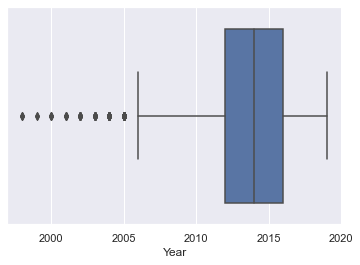

In [274]:
sns.boxplot(df.Year)

Again Kilometers_driven is an attribute of cars that affects the car price. There could be large variations in Kilometers_Driven but any value greater than zero is a valid data. Also, median cars are about 50000 miles.

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Density'>

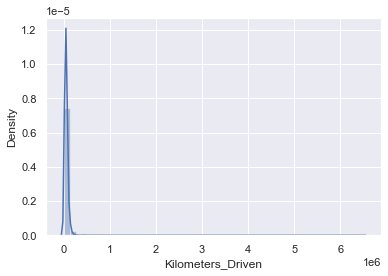

In [275]:
sns.distplot(df['Kilometers_Driven'])

some of the datapoints shows 0 mileage that looks like an outlier. 

In [276]:
df[df['Mileage']==0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
14,Land Rover Freelander 2 TD4 SE,Pune,2012.0,85000.0,Diesel,Automatic,Second,0.0,2179.0,115.00,5.0,13900000.0,1750000.0,Land,SE
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019.0,15369.0,Diesel,Automatic,First,0.0,1950.0,194.00,5.0,4914000.0,3567000.0,Mercedes-Benz,220d
194,Honda City 1.5 GXI,Ahmedabad,2007.0,60006.0,Petrol,Manual,First,0.0,1493.0,100.00,5.0,805000.0,295000.0,Honda,GXI
229,Ford Figo Diesel,Bangalore,2015.0,70436.0,Diesel,Manual,First,0.0,1498.0,99.00,5.0,1212000.0,360000.0,Ford,Diesel
544,Mercedes-Benz New C-Class Progressive C 200,Kochi,2019.0,13190.0,Petrol,Automatic,First,0.0,1950.0,181.43,5.0,4949000.0,3899000.0,Mercedes-Benz,200
707,Mercedes-Benz M-Class ML 350 4Matic,Pune,2014.0,120000.0,Diesel,Automatic,First,0.0,2987.0,165.00,5.0,7943000.0,3000000.0,Mercedes-Benz,4Matic
749,Land Rover Range Rover 3.0 D,Mumbai,2008.0,55001.0,Diesel,Automatic,Second,0.0,2993.0,255.00,5.0,13900000.0,2650000.0,Land,D
962,Mercedes-Benz C-Class Progressive C 220d,Mumbai,2018.0,8682.0,Diesel,Automatic,First,0.0,1950.0,194.00,5.0,5226000.0,3950000.0,Mercedes-Benz,220d
996,Hyundai Santro Xing GL,Pune,2008.0,93000.0,Petrol,Manual,First,0.0,1086.0,62.00,5.0,2575000.0,145000.0,Hyundai,GL
1059,Hyundai Santro Xing GL,Hyderabad,2010.0,58163.0,Petrol,Manual,First,0.0,1086.0,62.00,5.0,2575000.0,245000.0,Hyundai,GL


In [277]:
Mile_Missing_Brand = NP_Median['Brand'].tolist()
Mile_Missing_Median = NP_Median['Mileage'].tolist()
Mile_Median_dict = {}
for key in Mile_Missing_Brand:
    for value in Mile_Missing_Median:
        Mile_Median_dict[key] = value
        Mile_Missing_Median.remove(value)
        break  

Mile_Median_dict

{'Ambassador': 12.8,
 'Audi': 15.73,
 'BMW': 17.05,
 'Bentley': 8.6,
 'Chevrolet': 18.2,
 'Datsun': 22.7,
 'Fiat': 19.0,
 'Force': 17.0,
 'Ford': 18.88,
 'Honda': 17.7,
 'Hyundai': 18.9,
 'ISUZU': 12.4,
 'Isuzu': 13.8,
 'Jaguar': 14.74,
 'Jeep': 17.1,
 'Lamborghini': 6.4,
 'Land': 12.63,
 'Mahindra': 15.1,
 'Maruti': 21.4,
 'Mercedes-Benz': 14.21,
 'Mini': 18.15,
 'Mitsubishi': 13.17,
 'Nissan': 19.34,
 'Porsche': 15.15,
 'Renault': 19.87,
 'Skoda': 17.2,
 'Tata': 20.65,
 'Toyota': 12.99,
 'Volkswagen': 17.21,
 'Volvo': 13.5}

In [278]:
for k,v in Mile_Median_dict.items():
    for j in df.index:
        if df.loc[j,'Brand']==k and df.loc[j,'Mileage']==0:
            df.loc[j,'Mileage']= v

Most cars have mileage in the range of 15-21 kmpl

<AxesSubplot:xlabel='Mileage'>

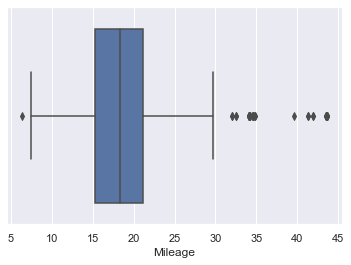

In [279]:
sns.boxplot(df.Mileage)

Don't see any outliers in engine. Also, Most car engines are between 1000-2000 CC. 

<AxesSubplot:xlabel='Engine'>

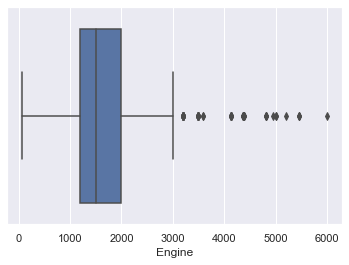

In [280]:
sns.boxplot(df.Engine)

Don't see any outliers in Power. Also, most cars have between 80-150 bhp. 

<AxesSubplot:xlabel='Power'>

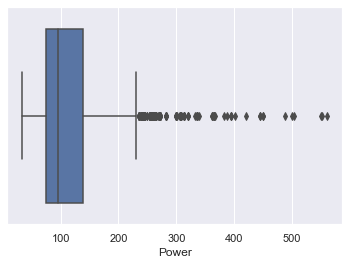

In [281]:
sns.boxplot(df.Power)

Don't see any outliers in New_Price

<AxesSubplot:xlabel='New_Price'>

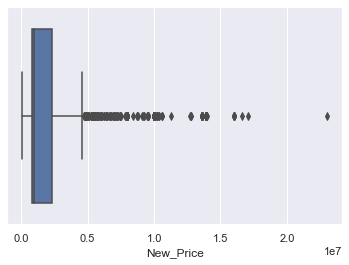

In [282]:
sns.boxplot(df['New_Price'])

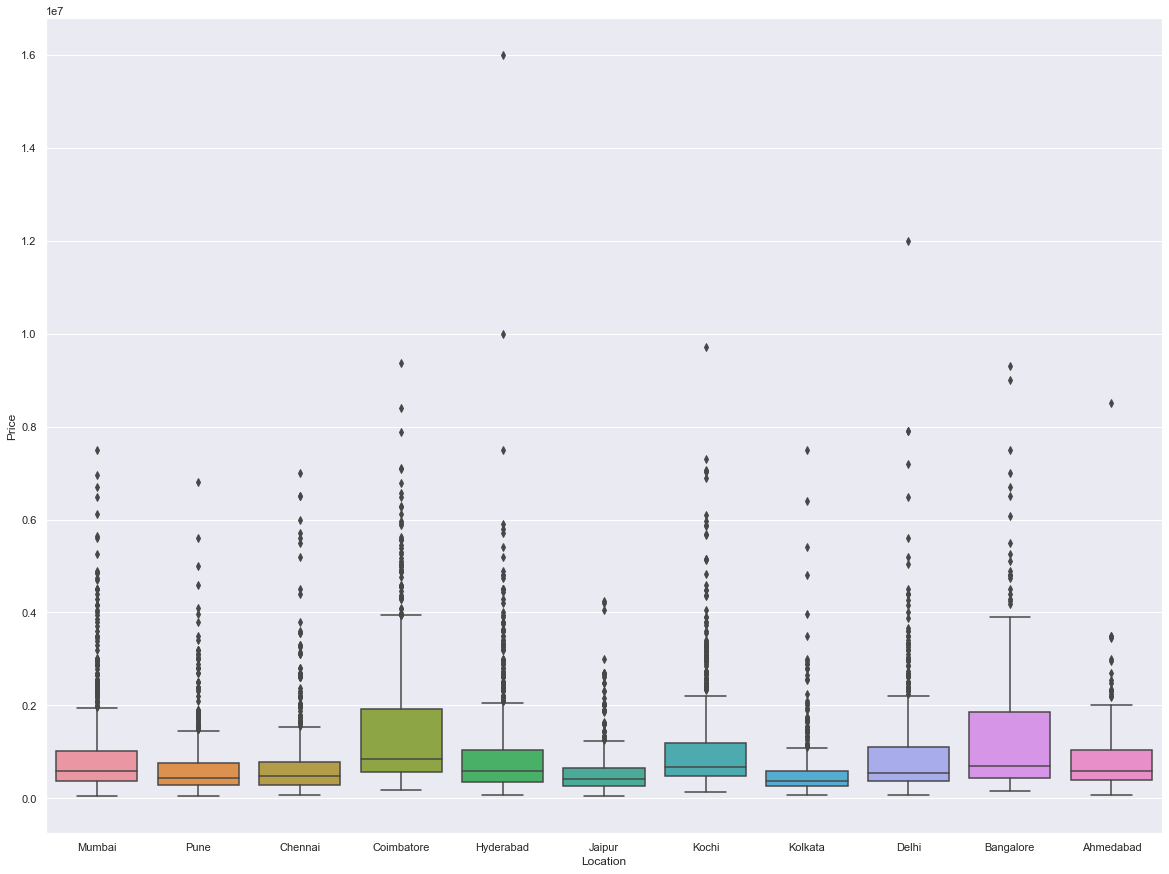

In [283]:
plt.figure(figsize=(20, 15))
sns.boxplot(x="Location", y="Price", data=df);

Plot above shows that either prices of used cars is higher in Coimbatore and Banglore, or expensive cars are selling in these two cities. 

<AxesSubplot:xlabel='Location', ylabel='count'>

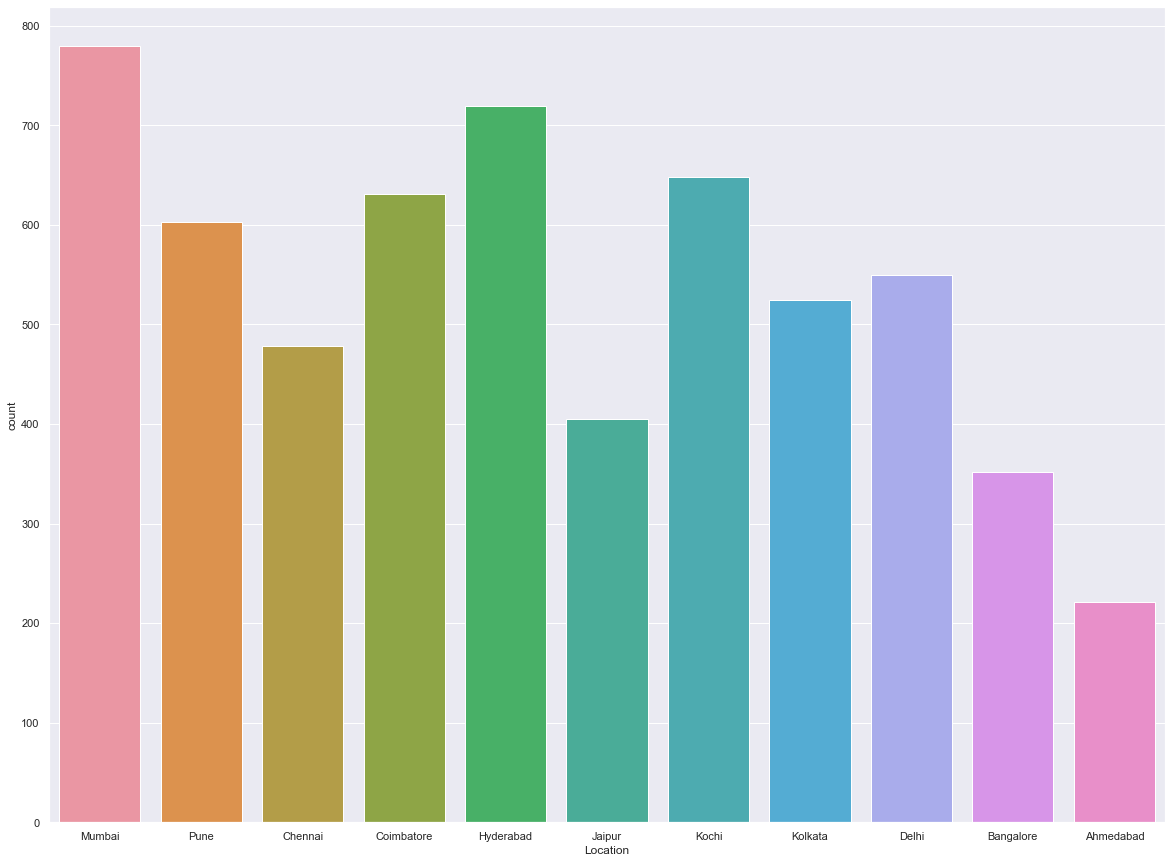

In [284]:
plt.figure(figsize=(20, 15))
sns.countplot(df['Location'])

Mumbai, Hydarabad and Kochi are 3 top cities for used car selling.

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

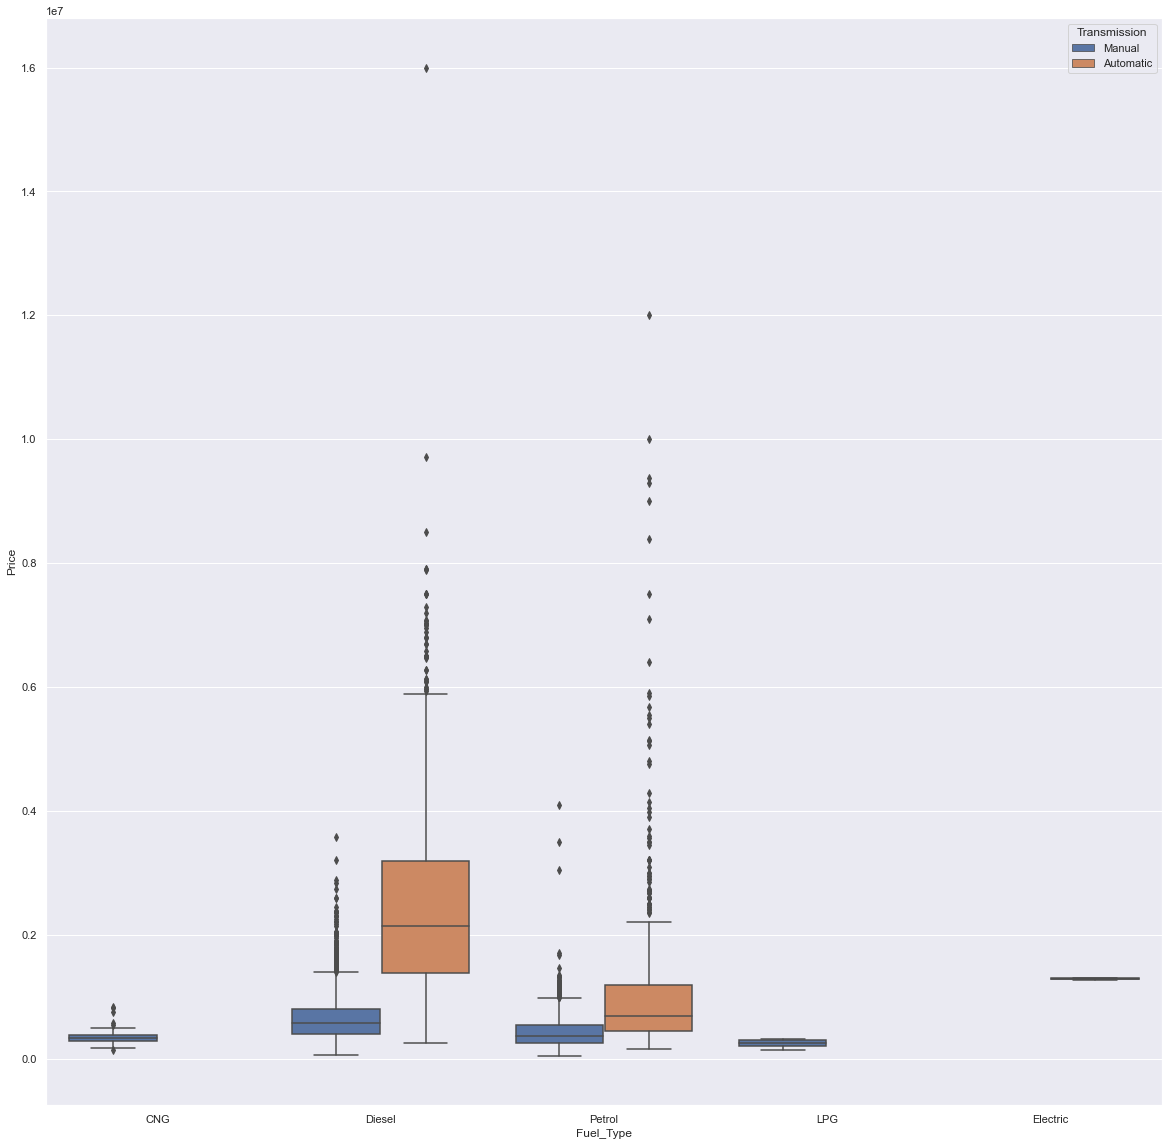

In [285]:
plt.figure(figsize=(20, 20))
sns.boxplot(x = 'Fuel_Type', y= 'Price', data=df, hue='Transmission')

Diesel cars with automatic transmission has good resale value. 

# Log Transformation

#### Looking at the diagonal plots, looks like all the independent variables are skewed. 

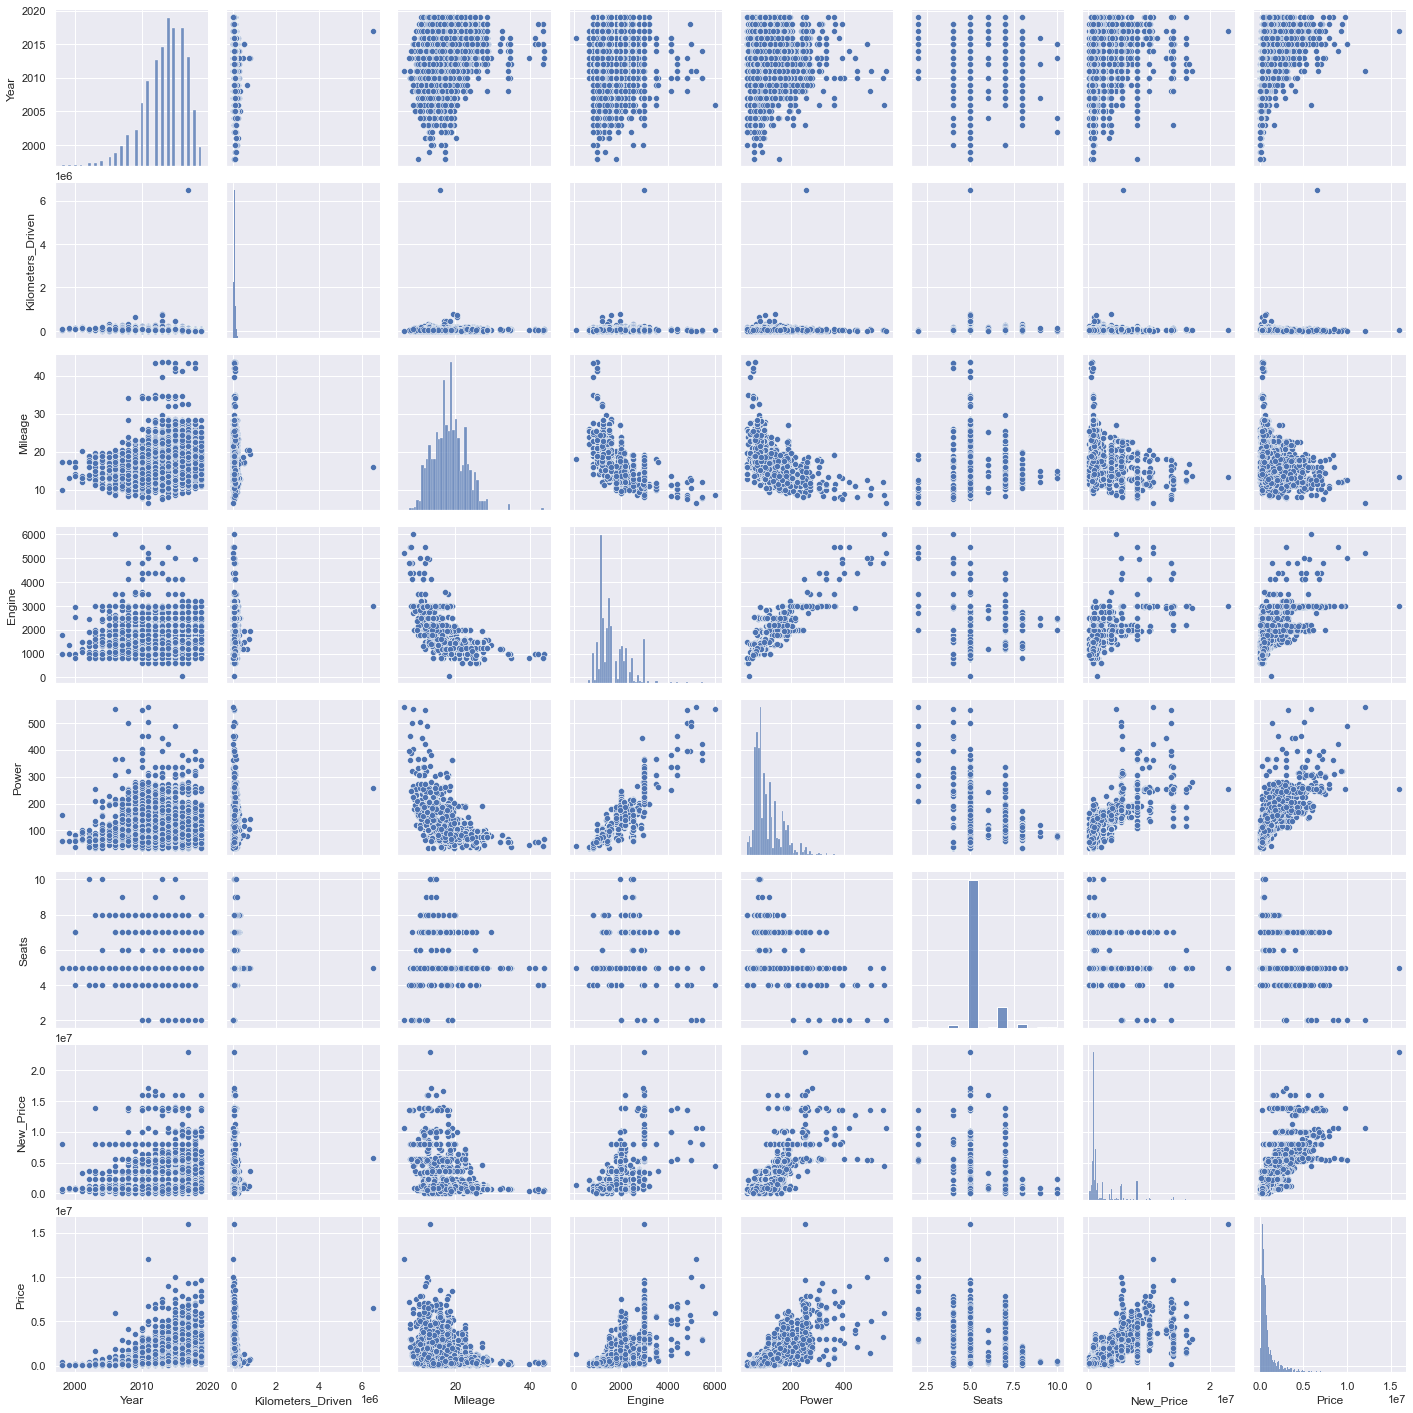

In [286]:
sns.pairplot(df)

In [287]:
df.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
Year,1.000000,-0.169879,0.280370,-0.066907,0.014590,0.010927,0.009573,0.298722
Kilometers_Driven,-0.169879,1.000000,-0.061441,0.092798,0.033551,0.082700,0.009189,-0.008507
Mileage,0.280370,-0.061441,1.000000,-0.629907,-0.540710,-0.339907,-0.391464,-0.331862
Engine,-0.066907,0.092798,-0.629907,1.000000,0.867306,0.398633,0.631120,0.657824
Power,0.014590,0.033551,-0.540710,0.867306,1.000000,0.100918,0.740320,0.772384
Seats,0.010927,0.082700,-0.339907,0.398633,0.100918,1.000000,-0.033276,0.055844
New_Price,0.009573,0.009189,-0.391464,0.631120,0.740320,-0.033276,1.000000,0.745992
Price,0.298722,-0.008507,-0.331862,0.657824,0.772384,0.055844,0.745992,1.000000


#### Taking log transformation of ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'New_Price', 'Price']

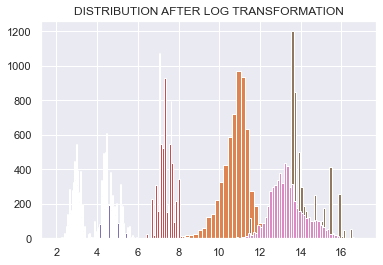

In [288]:
for i in ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'New_Price', 'Price']:
    df[i+'log'] = np.log(df[i]+1)
    plt.hist(df[i+'log'], bins=50)
    plt.title('DISTRIBUTION AFTER LOG TRANSFORMATION')

Distribution of the independent variables look somewhat like normal distribution. 

#### Defining dependent (df_dep) and independent(df_ind) variables for the model. 

In [289]:
df_ind = df.drop(columns=['Name','Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'New_Price', 'Price','Model','Pricelog'])
df_dep = df[['Pricelog']]

# Encoding categorical variables

In [290]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


df_ind = encode_cat_vars(df_ind)

In [291]:
df_ind.shape

(5912, 54)

In [292]:
df_ind.head()

,Seats,Yearlog,Kilometers_Drivenlog,Mileagelog,Enginelog,Powerlog,New_Pricelog,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,5.0,7.606387,11.184435,3.571784,6.906755,4.080246,13.577255,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,5.0,7.608871,10.621352,3.028683,7.367077,4.845761,14.230266,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5.0,7.606885,10.736418,2.954910,7.090077,4.496471,13.665851,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7.0,7.607381,11.373675,3.080533,7.130099,4.497139,13.577255,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,5.0,7.607878,10.613271,2.785011,7.585281,4.954418,15.485856,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Splitting train set and test set. 

In [293]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df_ind, df_dep, test_size=0.3, random_state=1)

In [294]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in train data =", x_test.shape[0])

Number of rows in train data = 4138
Number of rows in train data = 1774


#### Creating linear regression model

In [295]:
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

#### Coefficients, the positive coefficient indicates increase in dependent variable with increase in independent variable and the negetive coefficient indicates decrease in dependent variable with increase in independent variable. 

In [296]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Seats,4.682578e-02
Yearlog,2.274494e+02
Kilometers_Drivenlog,-6.777776e-02
Mileagelog,-1.020084e-01
Enginelog,2.449787e-01
Powerlog,8.025269e-01
New_Pricelog,1.616092e-01
Location_Bangalore,1.466461e-01
Location_Chennai,3.806435e-02
Location_Coimbatore,1.181762e-01


#### Creating fuctions for calculating r2, MAE, RMSE, adjusted R2

In [297]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Adjusted R^2
def adj_r2(df_ind, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = df_ind.shape[0]
    k = df_ind.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

In [298]:
# Checking model performance on train set
print("Training Performance\n")
print(model_perf(lin_reg_model, x_train, y_train))

# Checking model performance on test set
print("\n\nTest Performance\n")
print(model_perf(lin_reg_model, x_test, y_test))

Training Performance

       RMSE       MAE       R^2  Adjusted R^2
0  0.210379  0.157282  0.940162      0.939371


Test Performance

       RMSE       MAE       R^2  Adjusted R^2
0  0.236689  0.166044  0.927362      0.925081


# Conclusion on Model Performance

The train and test  𝑅2  are 0.0.9393 and 0.9250, indicating that the model explains 94% and 92% of the total variation in the train and test sets respectively. Also, both scores are comparable.

RMSE values on the train and test sets are also comparable.

This shows that the model is not overfitting.

MAE indicates that our current model is able to predict the price of used cars within a mean error of 0.16 on the test set.


# Insight for the business based on exploratory data analysis
    1. Most used cars in the datasets are between years 2012-2016. Ofcourse as the year goes up price goes up.
    2. Kilometers Driven of the cars in the database is skewed to left that means a lot of used cars have low Kilometers_Driven. 
    3. Most cars are 1000-2000CC and 80-150 bhp. 
    4. Out of all the cities in the database, prices of used cars is higher in Coimbatore and Banglore, and/or expensive cars are selling in these two cities. 
    5. Mumbai, Hydarabad, Kochi, and Coimbatore has highest use car sales. 
    6. Diesel cars with automatic transmission has good resale value. 
